Epinions.com is a website where people can post reviews of products and services. It covers a wide variety of topics. For this case study, we downloaded a set of 600 posts about digital cameras and cars and saved as “Eopinions.csv”.
The dataset has 2 columns: ‘class’ and ‘text’
These are the tasks which you have to perform:
• Read the file as a pandas data-frame.
• Perform Label Encoding on ‘class’ column.
• Plot a bar graph to compare the frequencies of both the classes.
• Preprocess the ‘text’ column
• Vectorize the text using CountVectorizer
• Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the original data. These are your Train and Test Data. Make sure train and test data are having same proportion of data points as the original data
• Train your machine learning algorithm for classification and prepare a model (you can choose any appropriate algorithm of your choice)
• Now test the model on the Test data and evaluate the Performance by providing Confusion Matrix for your model.
• Plot ROC Curve.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset/698_m5_datasets_v1.0/Eopinions.csv')

In [4]:
df.shape

(600, 2)

In [5]:
df.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


In [9]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()
df['class']=lblencoder.fit_transform(df['class'])
df['class'].unique()

array([0, 1], dtype=int64)

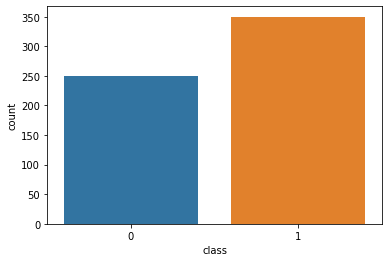

In [14]:
sns.countplot(df['class'])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cntvectorizer = CountVectorizer()
cnt_numbers = cntvectorizer.fit_transform(df['text'])
cnt_features = cntvectorizer.get_feature_names()
df_new = pd.DataFrame(cnt_numbers.toarray(), columns = cnt_features)

In [22]:
df_new.shape

(600, 13120)

In [24]:
X = df_new
y = df['class']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predicted_y = logreg.predict(X_test)

In [35]:
accuracy_score(predicted_y, y_test)

1.0

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_y, y_test)

array([[ 78,   0],
       [  0, 102]], dtype=int64)

In [38]:
from sklearn.metrics import roc_curve